##### Zadanie: analiza statystyczna
Dokonaj statystycznej analizy (obliczenie średniej, kwartyli czy wykresów pudełkowych) dla zmiennej Fare (opłata). Wynik pracy prześlij Mentorowi jako Jupyter Notebook zapisany na GitHub.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [2]:
df = pd.read_csv('titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
fare_values = df.loc[df['Fare'].notnull(), 'Fare'].values
print(fare_values.shape)

(891,)


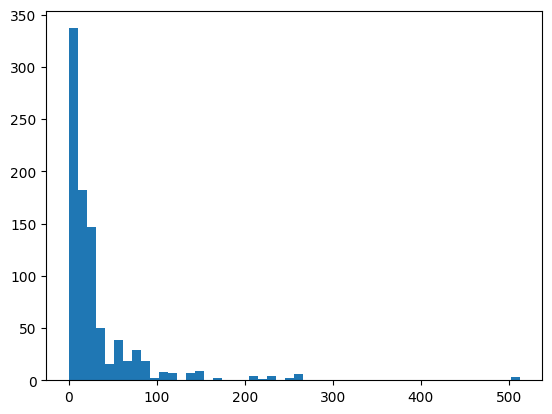

In [7]:
plt.hist(fare_values, bins=50) # 20 pudełek (słupków), a nie jak domyślnie 10
plt.show()

### Średnia

In [8]:
mean_fare = np.round(np.mean(fare_values))
print(mean_fare)

32.0


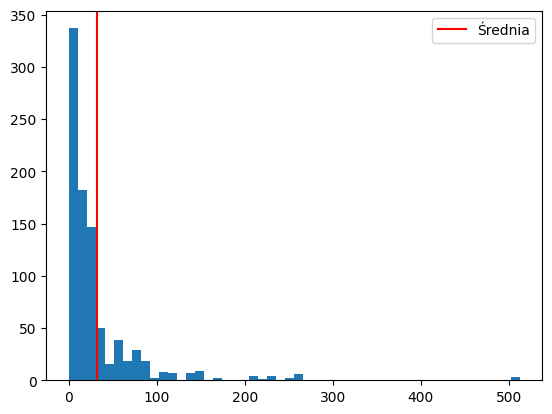

In [9]:
plt.hist(fare_values, bins=50)
plt.axvline(x = mean_fare, color='red', label='Średnia')
plt.legend(loc='upper right')
plt.show()

### Mediana

In [10]:
median_fare = np.median(fare_values)
print(median_fare)

14.4542


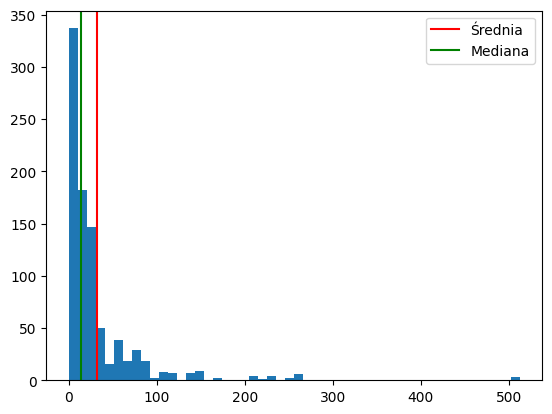

In [11]:
plt.hist(fare_values, bins=50)
plt.axvline(x=mean_fare, color='red', label='Średnia')
plt.axvline(x=median_fare, color='green', label='Mediana')
plt.legend(loc='upper right')
plt.show()

### Moda (Dominanta)

In [12]:
mode_fare = stats.mode(fare_values)
print(mode_fare)

ModeResult(mode=array([8.05]), count=array([43]))


C:\Users\magda\AppData\Local\Temp\ipykernel_12992\348530861.py:1: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_fare = stats.mode(fare_values)


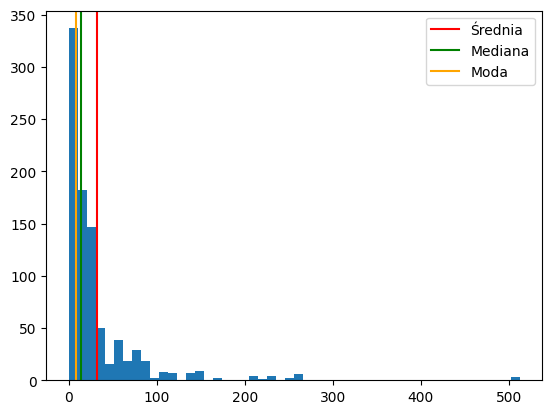

In [15]:
plt.hist(fare_values, bins=50)
plt.axvline(x=mean_fare, color='red', label='Średnia')
plt.axvline(x=median_fare, color='green', label='Mediana')
plt.axvline(x=mode_fare[0], color='orange', label='Moda')
plt.legend(loc='upper right')
plt.show()

### Kwartyle

In [14]:
q0 = np.quantile(fare_values, 0.0)
q1 = np.round(np.quantile(fare_values, 0.25))
q3 = np.round(np.quantile(fare_values, 0.75))
q4 = np.round(np.quantile(fare_values, 1.0))
print(f'Q0: {q0}')
print(f'Q1: {q1}')
print(f'Q2: {median_fare}')
print(f'Q3: {q3}')
print(f'Q4: {q4}')

Q0: 0.0
Q1: 8.0
Q2: 14.4542
Q3: 31.0
Q4: 512.0


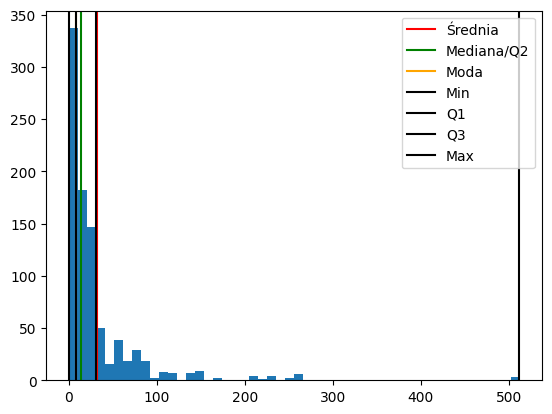

In [16]:
plt.hist(fare_values, bins=50)
plt.axvline(x=mean_fare, color='red', label='Średnia')
plt.axvline(x=median_fare, color='green', label='Mediana/Q2')
plt.axvline(x=mode_fare[0], color='orange', label='Moda')
plt.axvline(x=q0, color='black', label='Min')
plt.axvline(x=q1, color='black', label='Q1')
plt.axvline(x=q3, color='black', label='Q3')
plt.axvline(x=q4, color='black', label='Max')
plt.legend(loc='upper right')
plt.show()

### Zakres

In [17]:
range_fare = max(fare_values) - min(fare_values)
print(range_fare)

512.3292


### Rozstęp międzykwartylowy - IQR

In [18]:
iqr = q3 -q1
print(iqr)

23.0


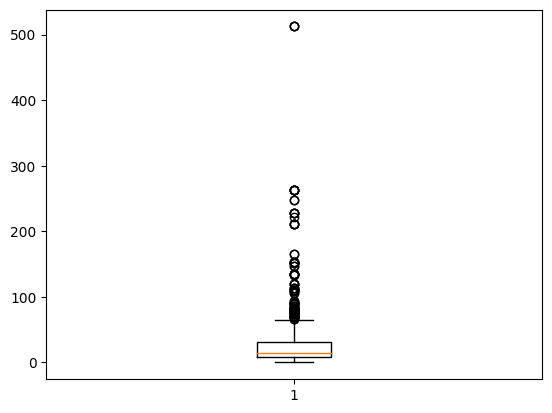

In [19]:
plt.boxplot(fare_values)
plt.show()

### Wariancja

In [20]:
variance_fare = np.var(fare_values, ddof=1)
print(variance_fare)

2469.436845743116


### Odchylenie standardowe

In [21]:
print(variance_fare**(1/2))

49.6934285971809


In [22]:
standard_deviation_fare = np.std(fare_values, ddof=1)
print(standard_deviation_fare)

49.6934285971809


### Asymetria rozkładu

In [23]:
skew_fare = stats.skew(fare_values)
print(skew_fare)

4.7792532923723545


### Skalowanie zmiennej

##### Standaryzacja

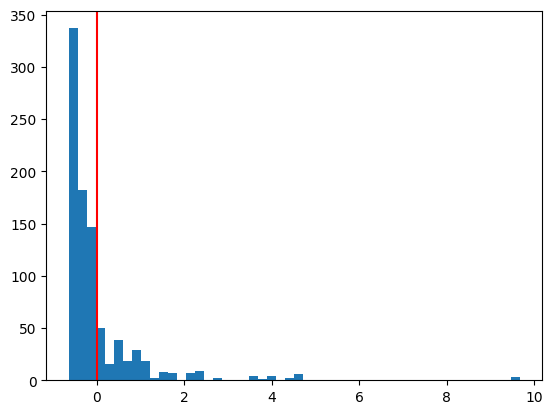

Średnia: 3.987332972840069e-18
Odchylenie standardowe: 1.0005616400330457


In [24]:
scaler_standardized = StandardScaler()
standardized_fare_values = scaler_standardized.fit_transform(fare_values.reshape(-1,1))
plt.hist(standardized_fare_values, bins=50)
plt.axvline(x = standardized_fare_values.mean(), color='red', label='Średnia')
plt.show()
print(f'Średnia: {standardized_fare_values.mean()}')
print(f'Odchylenie standardowe: {np.std(standardized_fare_values, ddof=1)}')

##### Min Max Scaler

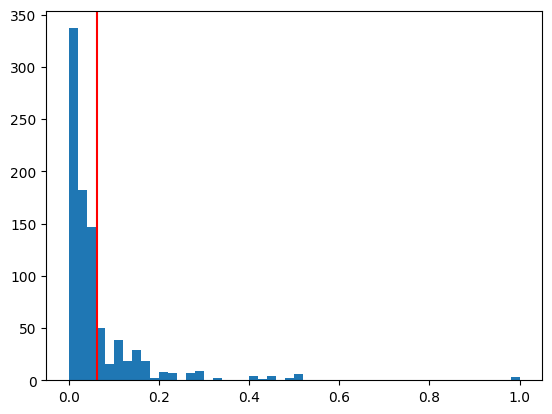

Średnia: 0.06285842768394742
Odchylenie standardowe: 0.09699511290236998


In [25]:
skaler_MinMax = MinMaxScaler()
normalized_fare_values = skaler_MinMax.fit_transform(fare_values.reshape(-1,1))
plt.hist(normalized_fare_values, bins=50)
plt.axvline(x = normalized_fare_values.mean(), color='red', label='Średnia')
plt.show()
print(f'Średnia: {normalized_fare_values.mean()}')
print(f'Odchylenie standardowe: {np.std(normalized_fare_values, ddof=1)}')

### Korelacja

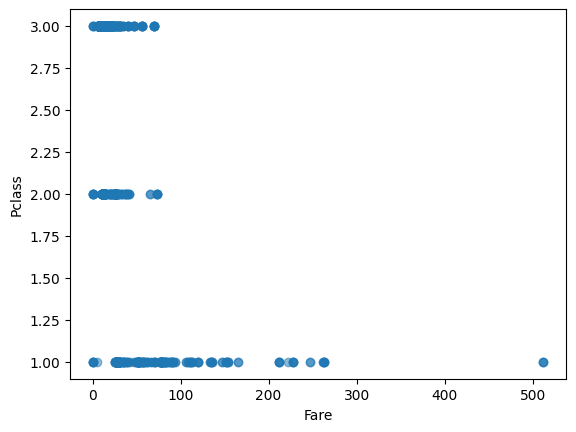

In [26]:
Pclass_values = df.loc[df['Fare'].notnull(), 'Pclass'].values
plt.scatter(x=fare_values, y=Pclass_values, alpha=0.5)
plt.xlabel('Fare')
plt.ylabel('Pclass')
plt.show()

##### Korelacja pearsona

In [27]:
stats.pearsonr(fare_values, Pclass_values)

PearsonRResult(statistic=-0.5494996199439078, pvalue=1.967386173420501e-71)